<a href="https://colab.research.google.com/github/Rockydedhia/Python_For_DataScience/blob/master/Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [40]:
from google.colab import files
uploaded = files.upload()

Saving playstore-analysis (2) (1).csv to playstore-analysis (2) (1) (1).csv


In [41]:
import io
y = pd.read_csv(io.BytesIO(uploaded['playstore-analysis (2) (1).csv']))
y.iloc[4453]

App               [substratum] Vacuum: P
Category                 PERSONALIZATION
Rating                               4.4
Reviews                              230
Size                               11000
Installs                          1,000+
Type                                Paid
Price                              $1.49
Content Rating                  Everyone
Genres                   Personalization
Last Updated               July 20, 2018
Current Ver                          4.4
Android Ver                          NaN
Name: 4453, dtype: object

In [42]:
y.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

In [43]:
a=y.dropna(subset=['Rating'],inplace=True)
y.isnull().sum()


App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [44]:
c=pd.isnull(y['Android Ver'])
y[c]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.000000,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.000000,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,21516.529524,Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [0]:
y.drop([10472],inplace=True)

In [46]:
c=pd.isnull(y['Android Ver'])
y[c]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,$1.49,Everyone,Personalization,"July 20, 2018",4.4,NaN
4490,Pi Dark [substratum],PERSONALIZATION,4.5,189,2100.0,"10,000+",Free,0,Everyone,Personalization,"March 27, 2018",1.1,NaN


In [47]:
y.mode()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,ROBLOX,FAMILY,4.4,2,21516.529524,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up


In [0]:
y['Android Ver'].fillna(y['Android Ver'].mode()[0],inplace=True)

In [49]:
y['Android Ver'].isnull().sum()


0

In [50]:
c=pd.isnull(y['Current Ver'])
y[c]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2700.0,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11.0,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8700.0,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up
7333,Dots puzzle,FAMILY,4.0,179,14000.0,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up


In [0]:
y['Current Ver'].fillna(y['Current Ver'].mode()[0],inplace=True)



**Data Clean Up**

#1 ) Not Understood

In [0]:
y['Price'] = y['Price'].str.strip("$")

In [53]:
y.loc[y['App'] == '[substratum] Vacuum: P']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,"1,000+",Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


In [0]:
y['Installs'] = y['Installs'].str.replace('\W',"")

In [55]:
y.loc[y['App'] == '[substratum] Vacuum: P']


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4453,[substratum] Vacuum: P,PERSONALIZATION,4.4,230,11000.0,1000,Paid,1.49,Everyone,Personalization,"July 20, 2018",4.4,4.1 and up


<function matplotlib.pyplot.show>

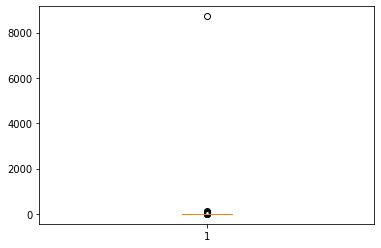

In [56]:
plt.boxplot(y['Price'].value_counts())
plt.show

In [57]:
y.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [58]:
y['Price']=y['Price'].apply(pd.to_numeric,errors='coerce')

y.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs           object
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [59]:
#Avg. rating should be between 1 and 5, as only these values are allowed on the play store

y=y[y['Rating'].between(1,5)]
print(y['Rating'])

0        4.1
1        3.9
2        4.7
3        4.5
4        4.3
        ... 
10834    4.0
10836    4.5
10837    5.0
10839    4.5
10840    4.5
Name: Rating, Length: 9366, dtype: float64


In [60]:
#Reviews should not be more than installs as only those who installed can review the app
b=y[y['Reviews']<y['Installs']]
print(b[['App','Reviews','Installs']])

                                                App Reviews  Installs
3                             Sketch - Draw & Paint  215644  50000000
5                        Paper flowers instructions     167     50000
6           Smoke Effect Photo Maker - Smoke Editor     178     50000
16     Photo Designer - Write your name with shapes    3632    500000
18                    FlipaClip - Cartoon animation  194216   5000000
...                                             ...     ...       ...
10791                             Winter Wonderland    1287     50000
10793                                     Sid Story   28510    500000
10800                                     FR Roster     174      5000
10827                            Fr Agnel Ambarnath     117      5000
10836                              Sya9a Maroc - FR      38      5000

[2037 rows x 3 columns]


In [61]:
y[y['Price']<200]
y['Price'].unique()


array([  0.  ,   4.99,   3.99,   6.99,   7.99,   5.99,   2.99,   3.49,
         1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,  24.99,
        11.99,  79.99,  16.99,  14.99,  29.99,  12.99,   2.49,  10.99,
         1.5 ,  19.99,  15.99,  33.99,  39.99,   3.95,   4.49,   1.7 ,
         8.99,   1.49,   3.88, 399.99,  17.99, 400.  ,   3.02,   1.76,
         4.84,   4.77,   1.61,   2.5 ,   1.59,   6.49,   1.29, 299.99,
       379.99,  37.99,  18.99, 389.99,   8.49,   1.75,  14.  ,   2.  ,
         3.08,   2.59,  19.4 ,   3.9 ,   4.59,  15.46,   3.04,  13.99,
         4.29,   3.28,   4.6 ,   1.  ,   2.95,   2.9 ,   1.97,   2.56,
         1.2 ])

<function matplotlib.pyplot.show>

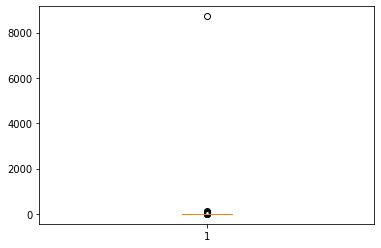

In [62]:
plt.boxplot(y['Price'].value_counts())
plt.show

In [63]:
#y['Price'].unique()
y=y[y['Price']<30]
print(y['Price'].unique())
print('Now the Price is less than $30')



[ 0.    4.99  3.99  6.99  7.99  5.99  2.99  3.49  1.99  9.99  7.49  0.99
  9.    5.49 10.   24.99 11.99 16.99 14.99 29.99 12.99  2.49 10.99  1.5
 19.99 15.99  3.95  4.49  1.7   8.99  1.49  3.88 17.99  3.02  1.76  4.84
  4.77  1.61  2.5   1.59  6.49  1.29 18.99  8.49  1.75 14.    2.    3.08
  2.59 19.4   3.9   4.59 15.46  3.04 13.99  4.29  3.28  4.6   1.    2.95
  2.9   1.97  2.56  1.2 ]
Now the Price is less than $30


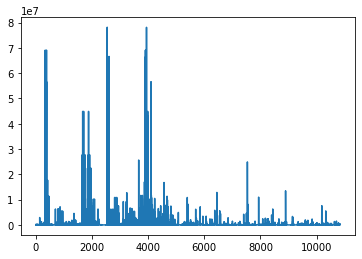

In [64]:
# Make suitable plot
y['Reviews']=y['Reviews'].apply(pd.to_numeric,errors='coerce')

y['Reviews'].plot(kind='line')

In [65]:
y[y['Reviews']<1000000]
print(y['Reviews'].unique())
print("Limit data to apps with < 1 Million reviews")

[   159    967  87510 ...    603   1195 398307]
Limit data to apps with < 1 Million reviews


In [0]:
#  Percentile of Installs Column
#y.Installs.rank(pct=True)


In [0]:
#y['Installs']=y['Installs'].apply(pd.to_numeric,errors='coerce')

#y.Installs.quantile(0.95)
#a=y[y.Installs < y.Installs.quantile(.95)]




In [0]:
#y['Installs'].value_counts()

In [0]:
#y.drop(a, axis=1, inplace=True)



In [67]:
sum = 0
for i in range(5):
  sum=sum+i
print("Addition is",s)

Addition is 10
